<a href="https://colab.research.google.com/github/gmMustafa/Titanic_Machine_Learning_from_Disaster/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing required libraries
!pip install seaborn numpy pandas matplotlib

In [2]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows/columns
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

In [5]:
# Summary statistics
df.describe()

# Survival rate by passenger class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [6]:
# Survival rate by gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [7]:
# Survival rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df.groupby('AgeGroup')['Survived'].mean()

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.396907
Senior         0.190476
Name: Survived, dtype: float64

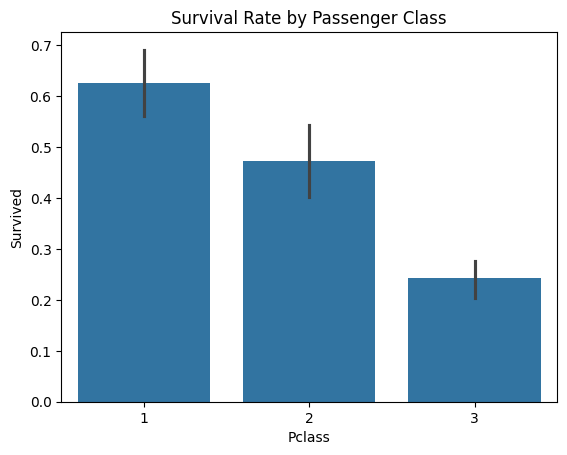

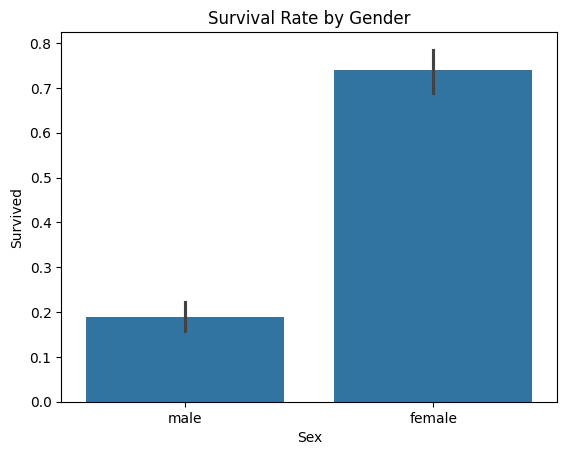

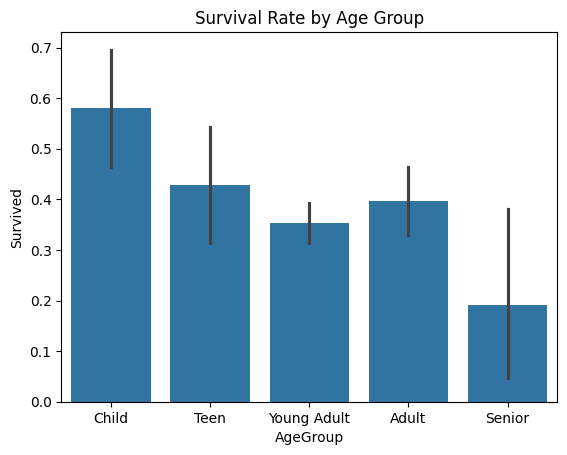

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


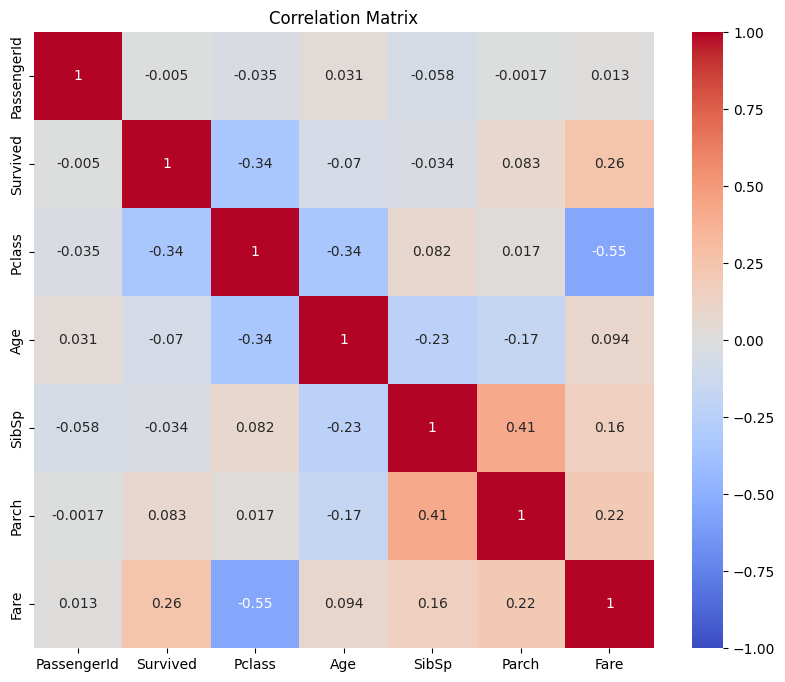

In [11]:
# Select numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()